In [1]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.24-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [35]:
df = pd.read_csv(r"C:\Users\siing\Downloads\ML Practice\Deepseek ANN\Data for GW.csv")

In [39]:
print(df)

   Elevation   Soil Type  Lithology  Rainfall  LST  Soil Moisture   Slope  \
0        120  Sandy Loam  Sandstone       800   28              45      2   
1        150        Clay      Shale       900   26              50      5   
2        200   Silt Loam  Limestone       750   30              40      3   
3        100  Sandy Clay    Granite      1000   25              55      1   
4        250  Loamy Sand     Basalt       600   32              35      7   
5        180   Clay Loam  Sandstone       850   27              48      4   
6        300  Sandy Loam      Shale       700   29              42      6   
7        220   Silt Loam  Limestone       950   24              52      2   
8        130        Clay    Granite      1100   23              58      1   
9        270  Loamy Sand     Basalt       650   31              38      8   

   Groundwater Level  
0                 15  
1                 12  
2                 18  
3                 10  
4                 20  
5             

In [43]:
print(df.dtypes)

Elevation             int64
Soil Type            object
Lithology            object
Rainfall              int64
LST                   int64
Soil Moisture         int64
Slope                 int64
Groundwater Level     int64
dtype: object


In [40]:
df["Soil Type"] =df["Soil Type"].astype(str)
df["Lithology"] =df["Lithology"].astype(str)

In [41]:
print(df)

   Elevation   Soil Type  Lithology  Rainfall  LST  Soil Moisture   Slope  \
0        120  Sandy Loam  Sandstone       800   28              45      2   
1        150        Clay      Shale       900   26              50      5   
2        200   Silt Loam  Limestone       750   30              40      3   
3        100  Sandy Clay    Granite      1000   25              55      1   
4        250  Loamy Sand     Basalt       600   32              35      7   
5        180   Clay Loam  Sandstone       850   27              48      4   
6        300  Sandy Loam      Shale       700   29              42      6   
7        220   Silt Loam  Limestone       950   24              52      2   
8        130        Clay    Granite      1100   23              58      1   
9        270  Loamy Sand     Basalt       650   31              38      8   

   Groundwater Level  
0                 15  
1                 12  
2                 18  
3                 10  
4                 20  
5             

In [46]:
print(df.dtypes)

Elevation             int64
Soil Type            object
Lithology            object
Rainfall              int64
LST                   int64
Soil Moisture         int64
Slope                 int64
Groundwater Level     int64
dtype: object


In [47]:
df_encoded = pd.get_dummies(df, columns= ["Soil Type", "Lithology"], drop_first =True, dtype=int)

In [48]:
print(df_encoded.head())

   Elevation  Rainfall  LST  Soil Moisture   Slope  Groundwater Level  \
0        120       800   28              45      2                 15   
1        150       900   26              50      5                 12   
2        200       750   30              40      3                 18   
3        100      1000   25              55      1                 10   
4        250       600   32              35      7                 20   

   Soil Type_Clay Loam  Soil Type_Loamy Sand  Soil Type_Sandy Clay  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     1   
4                    0                     1                     0   

   Soil Type_Sandy Loam  Soil Type_Silt Loam  Lithology_Granite  \
0                     1                    0                  0   
1     

Separate features (x) and target(y)

In [53]:
x = df_encoded.drop("Groundwater Level", axis=1)
y = df_encoded ["Groundwater Level"]

Normalize numerical features

In [55]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [57]:
print(x[:5])

[[-1.11954674 -0.19738551  0.17407766 -0.18060782 -0.79652144 -0.33333333
  -0.5        -0.33333333  2.         -0.5        -0.5        -0.5
   2.         -0.5       ]
 [-0.65306893  0.46056619 -0.52223297  0.51403765  0.46114399 -0.33333333
  -0.5        -0.33333333 -0.5        -0.5        -0.5        -0.5
  -0.5         2.        ]
 [ 0.12439408 -0.52636136  0.87038828 -0.87525329 -0.37729963 -0.33333333
  -0.5        -0.33333333 -0.5         2.         -0.5         2.
  -0.5        -0.5       ]
 [-1.43053195  1.11851788 -0.87038828  1.20868312 -1.21574324 -0.33333333
  -0.5         3.         -0.5        -0.5         2.         -0.5
  -0.5        -0.5       ]
 [ 0.9018571  -1.5132889   1.5666989  -1.56989876  1.29958761 -0.33333333
   2.         -0.33333333 -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5       ]]


Split the Data into Training and Testing Sets

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [59]:
print("Training data shape:", x_train.shape)
print("Training data shape:", x_test.shape)

Training data shape: (8, 14)
Training data shape: (2, 14)


Initialize the ANN

In [60]:
model = Sequential()

Add input layer and first hidden layer

In [61]:
model.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))

C:\Users\siing\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Add second hidden layer

In [62]:
model.add(Dense(units=64, activation='relu'))

Add output layer (for regression, no activation function)

In [63]:
model.add(Dense(units=1))

Compile the model

In [64]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

Model Summary

In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,185 (20.25 KB)

 Trainable params: 5,185 (20.25 KB)

 Non-trainable params: 0 (0.00 B)

Train the model


In [66]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step - loss: 290.1467 - mae: 16.6247 - val_loss: 180.7569 - val_mae: 13.1594
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 286.2738 - mae: 16.5127 - val_loss: 178.8676 - val_mae: 13.0921
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 282.4177 - mae: 16.4006 - val_loss: 176.9568 - val_mae: 13.0236
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 278.7003 - mae: 16.2922 - val_loss: 175.0969 - val_mae: 12.9563
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 275.0515 - mae: 16.1851 - val_loss: 173.2267 - val_mae: 12.8880
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 271.5332 - mae: 16.0808 - val_loss: 171.3652 - val_mae: 12.8197
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 268.0909 - mae: 15.9778 - val_loss: 169.4701 - val_mae: 12.7500
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 264.7780 - mae: 15.8782 - val_loss: 167.5889 - val_mae: 12.6806
Epoch 9/100
1/1 ━━━━━

Evaluate the model on the test set

In [68]:
test_loss, test_mae =model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

Test Loss (MSE): 51.294795989990234
Test MAE: 6.531081676483154


Predict groundwater levels for the test set

In [69]:
y_pred =model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [70]:
#Compare predictions with actual values
results =pd.DataFrame({"Actual": y_test, "Predicted": y_pred.flatten()})
print(results)

   Actual  Predicted
8       9   5.408267
1      12   2.529570


Visualize Training Progress
#Plot training and validation loss

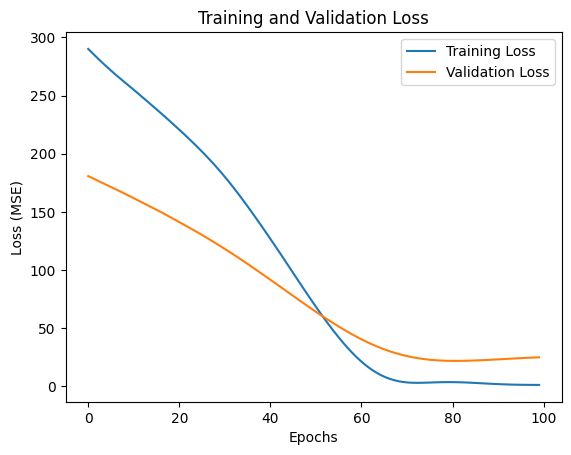

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

Visualize Predictions

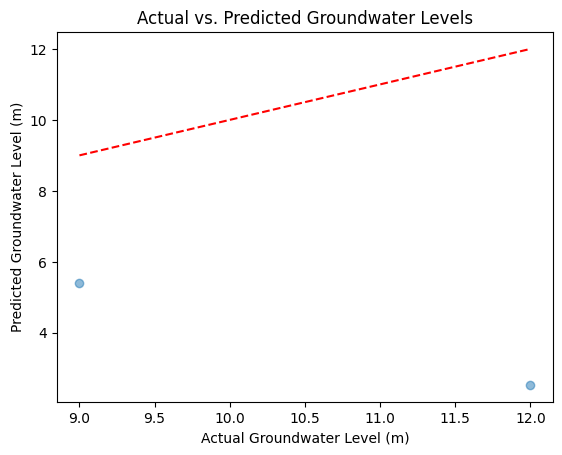

In [72]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs. Predicted Groundwater Levels')
plt.xlabel('Actual Groundwater Level (m)')
plt.ylabel('Predicted Groundwater Level (m)')
plt.show()

In [78]:
model.save("groundwater_ann_model.keras")